<a href="https://colab.research.google.com/github/ishnt/Data_science_stuff/blob/main/Microsoft_Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [120]:
import pandas_datareader as pdr
key="395e9b7dd78e633ab528066c2f3472a99c7b51a0"

In [121]:
df = pdr.get_data_tiingo('MSFT', api_key=key)

<ipython-input-121-7e177e74b516>:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pdr.get_data_tiingo('MSFT', api_key=key)


In [122]:

df.to_csv('MSFT.csv')

In [123]:
import pandas as pd

In [124]:
df=pd.read_csv('MSFT.csv')

In [125]:

df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,MSFT,2024-02-16 00:00:00+00:00,404.06,408.29,403.44,407.96,22296495,404.06,408.29,403.44,407.96,22296495,0.0,1.0
1253,MSFT,2024-02-20 00:00:00+00:00,402.79,404.49,398.01,403.24,24307915,402.79,404.49,398.01,403.24,24307915,0.0,1.0
1254,MSFT,2024-02-21 00:00:00+00:00,402.18,402.29,397.22,400.17,18631072,402.18,402.29,397.22,400.17,18631072,0.0,1.0
1255,MSFT,2024-02-22 00:00:00+00:00,411.65,412.83,408.57,410.19,27009869,411.65,412.83,408.57,410.19,27009869,0.0,1.0
1256,MSFT,2024-02-23 00:00:00+00:00,410.34,415.86,408.97,415.67,16295879,410.34,415.86,408.97,415.67,16295879,0.0,1.0


In [126]:

df1=df.reset_index()['close']

In [127]:
df1

0       112.17
1       112.03
2       112.53
3       112.26
4       111.70
         ...  
1252    404.06
1253    402.79
1254    402.18
1255    411.65
1256    410.34
Name: close, Length: 1257, dtype: float64

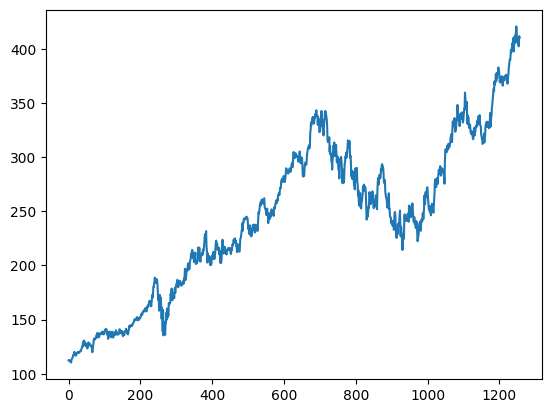

In [128]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [129]:
import numpy as np

In [130]:

df1

0       112.17
1       112.03
2       112.53
3       112.26
4       111.70
         ...  
1252    404.06
1253    402.79
1254    402.18
1255    411.65
1256    410.34
Name: close, Length: 1257, dtype: float64

In [131]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [132]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [133]:

training_size,test_size

(817, 440)

In [134]:
train_data

array([[5.73897343e-03],
       [5.28759350e-03],
       [6.89966469e-03],
       [6.02914625e-03],
       [4.22362652e-03],
       [4.38483363e-03],
       [0.00000000e+00],
       [3.86897085e-04],
       [7.86690740e-03],
       [1.04139799e-02],
       [1.32512252e-02],
       [1.35413980e-02],
       [1.77972659e-02],
       [2.31493423e-02],
       [2.34072737e-02],
       [2.29881352e-02],
       [3.16933196e-02],
       [2.14727882e-02],
       [2.34395151e-02],
       [2.42455507e-02],
       [2.05700284e-02],
       [2.10858912e-02],
       [2.43422750e-02],
       [2.78243487e-02],
       [2.83724529e-02],
       [3.08872840e-02],
       [2.89205571e-02],
       [3.06293526e-02],
       [3.07583183e-02],
       [2.86626257e-02],
       [3.15965953e-02],
       [3.20479752e-02],
       [3.40469435e-02],
       [3.43693578e-02],
       [3.34665979e-02],
       [3.66907403e-02],
       [4.18493681e-02],
       [4.31067836e-02],
       [4.85233428e-02],
       [4.71369616e-02],


In [135]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [136]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [137]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [138]:

print(X_test.shape), print(ytest.shape)

(339, 100)
(339,)


(None, None)

In [139]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [140]:

### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [141]:

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [142]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [143]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 10s 308ms/step - loss: 0.0496 - val_loss: 0.0386
Epoch 2/100
12/12 [==============================] - 2s 192ms/step - loss: 0.0082 - val_loss: 0.0032
Epoch 3/100
12/12 [==============================] - 3s 289ms/step - loss: 0.0037 - val_loss: 0.0050
Epoch 4/100
12/12 [==============================] - 2s 191ms/step - loss: 0.0015 - val_loss: 0.0036
Epoch 5/100
12/12 [==============================] - 2s 190ms/step - loss: 0.0013 - val_loss: 0.0021
Epoch 6/100
12/12 [==============================] - 2s 191ms/step - loss: 0.0012 - val_loss: 0.0023
Epoch 7/100
12/12 [==============================] - 2s 190ms/step - loss: 0.0012 - val_loss: 0.0023
Epoch 8/100
12/12 [==============================] - 3s 260ms/step - loss: 0.0012 - val_loss: 0.0019
Epoch 9/100
12/12 [==============================] - 3s 205ms/step - loss: 0.0012 - val_loss: 0.0021
Epoch 10/100
12/12 [==============================] - 3s 266ms/step - loss: 0.0012 - val_l

In [144]:
import tensorflow as tf

In [145]:

### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 0s 37ms/step


In [146]:


##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [147]:

### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))


233.46024386682487

In [148]:

### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

309.03958006470737

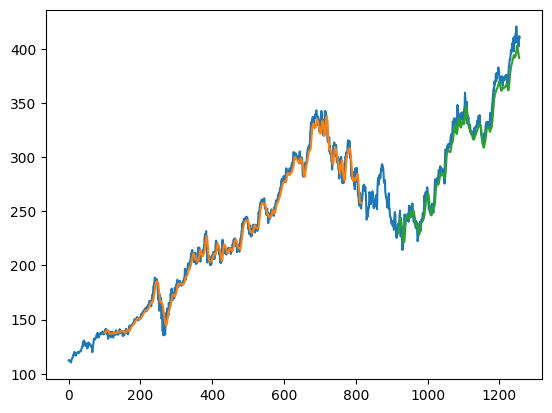

In [149]:

### Plotting
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [150]:

x_input=test_data[340:].reshape(1,-1)
x_input.shape

(1, 100)

In [151]:

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [152]:

temp_input

[0.6816159401599174,
 0.6545009027598657,
 0.6724432550941449,
 0.6737490327572865,
 0.6992197575444931,
 0.7074735620324993,
 0.702863038431777,
 0.7158563322156307,
 0.7117939128191902,
 0.7007351044622131,
 0.7165656435388187,
 0.7146956409595048,
 0.7084085633221563,
 0.7123097755996904,
 0.6973175135413979,
 0.7058614908434356,
 0.7097627031209698,
 0.7424555068351818,
 0.7012509672427133,
 0.7074413206087181,
 0.7316223884446736,
 0.7342017023471757,
 0.7598658756770699,
 0.7671201960278565,
 0.7815643538818674,
 0.7935904049522825,
 0.8064869744647923,
 0.8150954346143925,
 0.8070028372452928,
 0.835955635800877,
 0.826315450090276,
 0.8378901212277533,
 0.835955635800877,
 0.8569125612587053,
 0.83653598142894,
 0.861007222078927,
 0.8469177198865102,
 0.8623291204539593,
 0.8609749806551458,
 0.864779468661336,
 0.8779662109878771,
 0.8655532628320867,
 0.8657467113747744,
 0.8515604849110135,
 0.8342468403404694,
 0.84514444157854,
 0.8331506319319061,
 0.8400825380448801,
 0

In [153]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

[0.9148015]
101
1 day input [0.6545009  0.67244326 0.67374903 0.69921976 0.70747356 0.70286304
 0.71585633 0.71179391 0.7007351  0.71656564 0.71469564 0.70840856
 0.71230978 0.69731751 0.70586149 0.7097627  0.74245551 0.70125097
 0.70744132 0.73162239 0.7342017  0.75986588 0.7671202  0.78156435
 0.7935904  0.80648697 0.81509543 0.80700284 0.83595564 0.82631545
 0.83789012 0.83595564 0.85691256 0.83653598 0.86100722 0.84691772
 0.86232912 0.86097498 0.86477947 0.87796621 0.86555326 0.86574671
 0.85156048 0.83424684 0.84514444 0.83315063 0.84008254 0.85065773
 0.84121099 0.85114135 0.8511091  0.82389734 0.83937323 0.84556358
 0.84753031 0.83901857 0.84843307 0.85178617 0.85204411 0.85014186
 0.85404307 0.85649342 0.83982461 0.83895409 0.83037787 0.82976528
 0.85214083 0.85568739 0.8781919  0.88418881 0.89656951 0.90237297
 0.89979365 0.91397988 0.92945576 0.92249162 0.93019732 0.94199768
 0.94944545 0.94641475 0.96508254 0.96143926 0.92594145 0.94593113
 0.96991875 0.95196028 0.95144442 

In [154]:

day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [155]:
import matplotlib.pyplot as plt

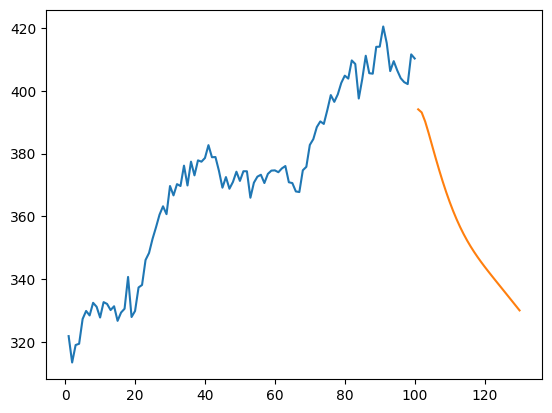

In [156]:

plt.plot(day_new,scaler.inverse_transform(df1[1157:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

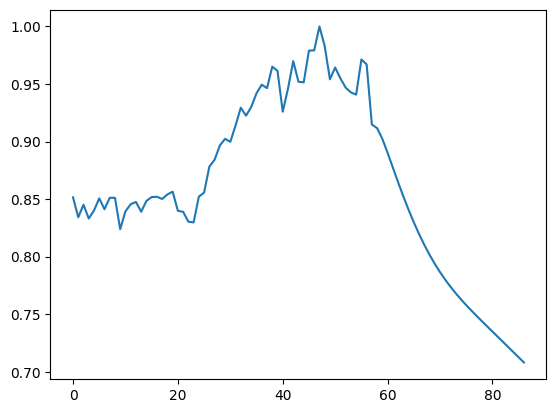

In [157]:

df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [158]:

df3=scaler.inverse_transform(df3).tolist()

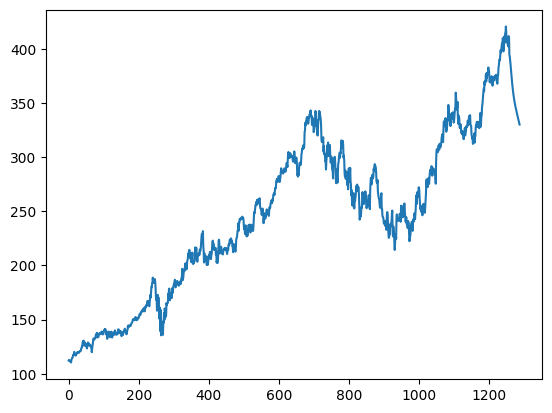

In [159]:

plt.plot(df3)